In [9]:
import argparse
import json
import os

import torch

from dataset import ECG_DataModule
from trainer import Trainer
from model import RNNModel  # Import the model

import torch.optim as optim
import torch.nn as nn

🔄 Starting main function
Loaded dataset for training: 10000
Loaded dataset for test: 2000
Number of unique classes: 3
✅ Train DataLoader size: 313
✅ Test DataLoader size: 63
🚀 Initializing Trainer...
🔥 Starting training now...
🚀 Training Started!


100%|██████████| 313/313 [00:02<00:00, 151.90it/s, loss=0.9489]


- [001/010] Train loss: 1.0937, Train acc: 0.3973, learning rate: 0.001000


100%|██████████| 63/63 [00:00<00:00, 294.98it/s, loss=1.0802]
c:\Users\shubh\OneDrive\Desktop\dummy\trainer.py:120: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.metrics_df = pd.concat(


- [001/010] Validation loss: 1.0766, Validation acc: 0.4185
******************************


100%|██████████| 313/313 [00:02<00:00, 148.69it/s, loss=1.1438]


- [002/010] Train loss: 0.9492, Train acc: 0.5587, learning rate: 0.001000


100%|██████████| 63/63 [00:00<00:00, 373.87it/s, loss=1.0768]


- [002/010] Validation loss: 0.9930, Validation acc: 0.5235
******************************


100%|██████████| 313/313 [00:02<00:00, 152.56it/s, loss=0.7661]


- [003/010] Train loss: 0.7240, Train acc: 0.6909, learning rate: 0.001000


100%|██████████| 63/63 [00:00<00:00, 325.37it/s, loss=1.0227]


- [003/010] Validation loss: 0.9516, Validation acc: 0.5750
******************************


100%|██████████| 313/313 [00:02<00:00, 150.32it/s, loss=0.6138]


- [004/010] Train loss: 0.4746, Train acc: 0.8159, learning rate: 0.001000


100%|██████████| 63/63 [00:00<00:00, 422.21it/s, loss=0.5831]


- [004/010] Validation loss: 1.0167, Validation acc: 0.6140
******************************


100%|██████████| 313/313 [00:01<00:00, 158.50it/s, loss=0.2460]


- [005/010] Train loss: 0.3096, Train acc: 0.8808, learning rate: 0.001000


100%|██████████| 63/63 [00:00<00:00, 264.07it/s, loss=1.1326]


- [005/010] Validation loss: 1.2012, Validation acc: 0.6310
******************************


100%|██████████| 313/313 [00:02<00:00, 156.13it/s, loss=0.0766]


- [006/010] Train loss: 0.1367, Train acc: 0.9586, learning rate: 0.000100


100%|██████████| 63/63 [00:00<00:00, 356.37it/s, loss=1.1107]


- [006/010] Validation loss: 1.1501, Validation acc: 0.6490
******************************


100%|██████████| 313/313 [00:02<00:00, 142.15it/s, loss=0.0251]


- [007/010] Train loss: 0.0611, Train acc: 0.9935, learning rate: 0.000100


100%|██████████| 63/63 [00:00<00:00, 416.87it/s, loss=1.1662]


- [007/010] Validation loss: 1.1915, Validation acc: 0.6540
******************************


100%|██████████| 313/313 [00:02<00:00, 143.70it/s, loss=0.0418]


- [008/010] Train loss: 0.0367, Train acc: 0.9984, learning rate: 0.000100


100%|██████████| 63/63 [00:00<00:00, 225.89it/s, loss=1.2022]


- [008/010] Validation loss: 1.2430, Validation acc: 0.6550
******************************


100%|██████████| 313/313 [00:02<00:00, 138.81it/s, loss=0.0318]


- [009/010] Train loss: 0.0242, Train acc: 0.9994, learning rate: 0.000100


100%|██████████| 63/63 [00:00<00:00, 342.09it/s, loss=1.2384]


- [009/010] Validation loss: 1.2943, Validation acc: 0.6530
******************************


100%|██████████| 313/313 [00:02<00:00, 144.98it/s, loss=0.0046]


- [010/010] Train loss: 0.0168, Train acc: 0.9996, learning rate: 0.000100


100%|██████████| 63/63 [00:00<00:00, 385.24it/s, loss=1.2713]


- [010/010] Validation loss: 1.3416, Validation acc: 0.6535
******************************
End of training. Total time: 23.29025 seconds


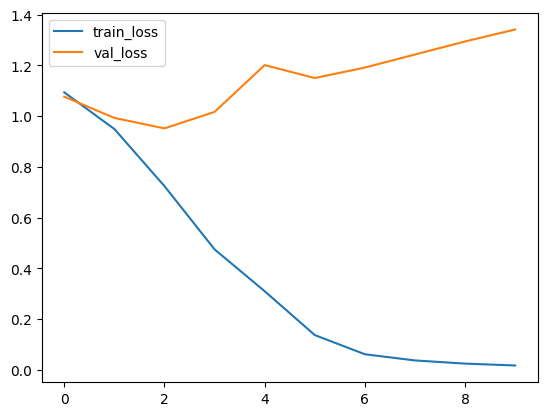

✅ Training completed!


In [11]:
def main(dataset="icentia11k", dataset_path="./data/icentia11k.pkl", batch_size=32, seed=None):
    # Dataloader
    data_module = ECG_DataModule(dataset, dataset_path, batch_size=batch_size, seed=seed)
    train_loader = data_module.train_dataloader()
    test_loader = data_module.test_dataloader()
    
    print(f"✅ Train DataLoader size: {len(train_loader)}")
    print(f"✅ Test DataLoader size: {len(test_loader)}")

    # Model
    model = RNNModel(input_size=2049, hidden_size=128, num_layers=2, num_classes=data_module.num_classes)
    model.to("cuda" if torch.cuda.is_available() else "cpu")

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Initialize Trainer
    print("🚀 Initializing Trainer...")
    trainer = Trainer(model, criterion, optimizer, scheduler, 
                      device="cuda" if torch.cuda.is_available() else "cpu",
                      result_dir="./results", num_classes=data_module.num_classes)
    
    print("🔥 Starting training now...")
    trainer.fit(train_loader, test_loader, epochs=10)  # <--- Check if this runs
    print("✅ Training completed!")

if __name__ == "__main__":
    print("🔄 Starting main function")
    main()